In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sn
import scipy.io as sio
import os

In [2]:
## Baseline (No-human) ##
filename = "T2_CSI_Data/t2_com2_noHuman2.csv"
data = pd.read_csv(filename,header=None)
df = data.iloc[:, 25]
df = [item for item in df if not(pd.isnull(item)) == True]

csi_data = []
#for i in range(len(df)):
for i in range(2000):
    str1 = df[i].replace("[","")
    str2 = str1.replace("]","")
    list = str2.split(" ")
    list.pop(0)
    del list[-1]
    del list[-1]
    csi_data.append([float(j) for j in list])

csi_data = np.array(csi_data).T.tolist()
csi_data = pd.DataFrame(csi_data)

In [3]:
output_list = []

In [4]:
quartile = "Q4"
for r in range(1,2):
    file_dir = "T2_CSI_Data"
    name = "t2_com2_" + quartile + "_corner"
    csv = ".csv"
    name_csv = name+csv
    file_name = os.path.join(file_dir, name_csv)
    data_walk = pd.read_csv(file_name, header=None, encoding='utf-8')

    df_walk = data_walk.iloc[:, 25]
    df_walk = [item for item in df_walk if not(pd.isnull(item)) == True]
    csi_data_walk = []
    #for i in range(len(df)):
    for i in range(2000):
        str1 = df_walk[i].replace("[","")
        str2 = str1.replace("]","")
        list = str2.split(" ")
        list.pop(0)
        del list[-1]
        del list[-1]
        csi_data_walk.append([float(j) for j in list])
    csi_data_walk = np.array(csi_data_walk).T.tolist()
    csi_data_walk = pd.DataFrame(csi_data_walk)
    sampling_range = 20
    output = []
    for k in range(126):
        subcarrier = []
        for i in range(0,2000,sampling_range):
            temp_data = []
            for j in range(i, i+sampling_range):
                temp_data.append(math.pow(csi_data_walk[j][k] - csi_data.mean(axis=1)[k],2))
            subcarrier.append(math.sqrt(sum(temp_data)/sampling_range))
        output.append(subcarrier)
    output_list.append(output)
    sd_output = pd.DataFrame(output)
    #sd_array = sd_output.to_numpy()
    #csi_list.append(sd_array)


ParserError: Error tokenizing data. C error: Expected 1 fields in line 22, saw 2


In [198]:
output_array = np.array(output_list)

In [199]:
max(sd_output)

99

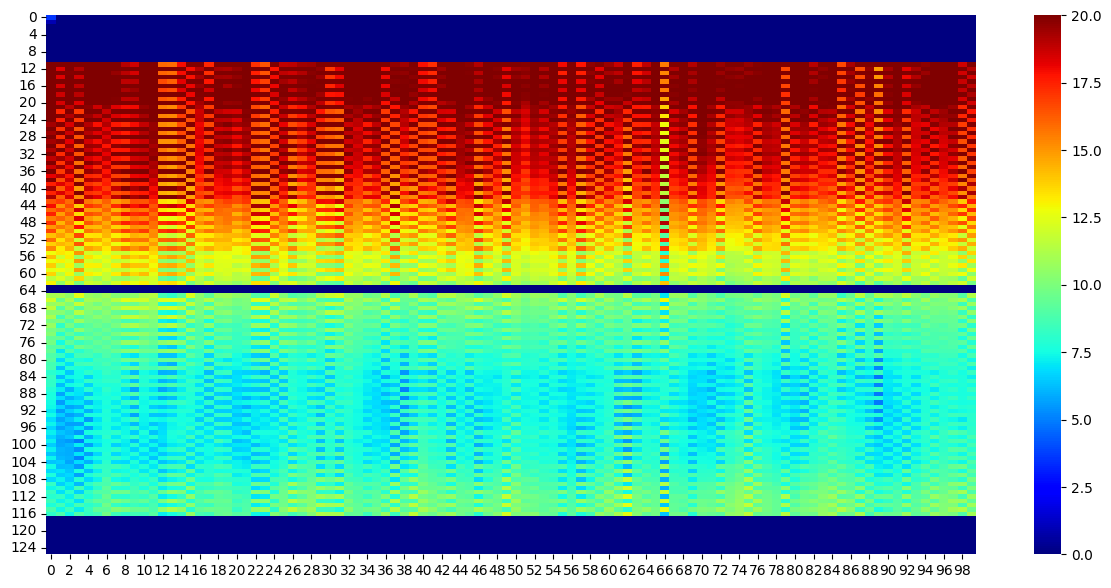

In [200]:
plt.figure(figsize = (15, 7))
sn.heatmap(sd_output, cmap="jet", vmin=0, vmax=20)
plt.savefig(name+".jpg")
plt.show()

In [187]:
output_array[15]

array([[0.064, 0.064, 0.064, ..., 0.064, 0.064, 0.064],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ]])

In [188]:
output_reshape = output_array.reshape(output_array.shape[0], -1)
np.savetxt("csi_txrx.csv", output_reshape)

In [206]:
load_txrx = np.loadtxt("csi_txrx.csv")
load_rxtx = np.loadtxt("csi_rxtx.csv")

In [220]:
csi_txrx= load_txrx.reshape(output_array.shape[0], output_array.shape[1], output_array.shape[2])
csi_rxtx= load_rxtx.reshape(output_array.shape[0], output_array.shape[1], output_array.shape[2])

In [221]:
csi = np.concatenate((csi_txrx, csi_rxtx),axis=0)

In [263]:
zeros = np.zeros(30)
ones = np.ones(30)
answer = np.concatenate((zeros, ones))

In [264]:
import random
permutation = np.random.permutation(len(csi))
# Use the same permutation to shuffle both arrays
shuffled_csi = csi[permutation]
shuffled_answer = answer[permutation]

In [296]:
x_train = shuffled_csi[:50]
x_test = shuffled_csi[50:60]
y_train = shuffled_answer[:50]
y_test = shuffled_answer[50:60]

In [334]:
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

In [357]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(126, 100)),
    keras.layers.Dense(8, activation='sigmoid'),
    keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
2/2 [==============================] - 0s 2ms/step - loss: 0.7110 - accuracy: 0.5400
Epoch 2/10
2/2 [==============================] - 0s 2ms/step - loss: 0.6241 - accuracy: 0.6600
Epoch 3/10
2/2 [==============================] - 0s 2ms/step - loss: 0.5894 - accuracy: 0.7000
Epoch 4/10
2/2 [==============================] - 0s 1ms/step - loss: 0.5531 - accuracy: 0.8400
Epoch 5/10
2/2 [==============================] - 0s 1ms/step - loss: 0.5207 - accuracy: 0.9000
Epoch 6/10
2/2 [==============================] - 0s 1ms/step - loss: 0.4837 - accuracy: 0.9800
Epoch 7/10
2/2 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.8200
Epoch 8/10
2/2 [==============================] - 0s 2ms/step - loss: 0.4260 - accuracy: 0.9800
Epoch 9/10
2/2 [==============================] - 0s 2ms/step - loss: 0.4195 - accuracy: 0.9800
Epoch 10/10
2/2 [==============================] - 0s 2ms/step - loss: 0.3855 - accuracy: 0.9800


In [358]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 48ms/step - loss: 0.3978 - accuracy: 0.9000


[0.397757887840271, 0.8999999761581421]

NameError: name 'model' is not defined